# Dreading tales of SVD and PCA
## Explore the maths behind with python interpretation
How many times I may walk over this super popular ML topic but it never ceases to amaze (or you may say scare me) with its ability to project itself to different spaces altogether. Let’s deconstruct and reconstruct this once again for one and all.
Here’s a short introduction of PCA for those who never found it friendly enough (you’re not to be blamed). Greet it with overwhelming features and it will help you by reducing the feature space to what could be absorbed by your favorite models. Mind you, its no normal reduction but projection to different set of orthogonal coordinates where no correlation can exist (can you foresee elimination of multicollinearity here!).

### Start treading the unknown path to unravel the mystery behind it.  
In order to understand the maths behind, assume you have a matrix A of n rows and d columns. Our objective is to project this data to a different set of orthogonal coordinates with minimum loss of information.

Let’s pause for a minute to check out the beauty of the orthogonal system. We are designing our system in a way that there won’t be any correlation that will exist between axes once we have projected our data in all the perpendicular axes independently.

As these orthogonal axes (that we will soon be computing) are directional vectors so these are basically the unit vectors and thus we can further extend the constraints imposed on the system to make it an orthonormal i.e., $|V^TV|=1$ system.

Let’s start with the estimation of the first axis which can be transcended as finding the best fit line to the data.  In case of our matrix A, consider each row as different vectors which are to be projected on the 1-D vector such that the sum of the squares of the perpendicular distances of the points to this 1-D vector are minimized (We are talking about projecting rows as basic matrix operation of Av implies dot product of rows with vector v).

If we consider, projecting a row xi of the data onto a line through the origin. Then,

$x_{i1}^2 + x_{i2}^2 +………………+ x_{id}^2 = (length \space of\space projection)^2 + (distance\space of \space point\space to \space line)^2$

$(distance\space of \space point\space to \space line)^2 = x_{i1}^2 + x_{i2}^2 +………………+ x_{id}^2  -  (length \space of\space projection)^2$

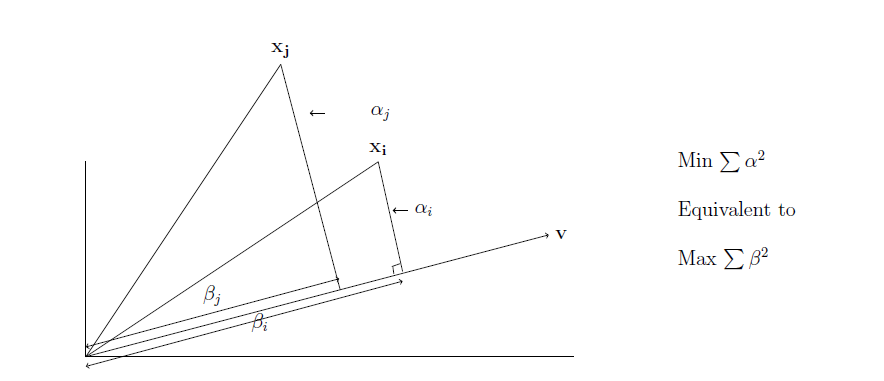

Here, minimizing the sum of the squares of the distances is equivalent to maximizing
the sum of the squares of the lengths of the projections onto the line. This way we can find the first basis vector v1 capturing the maximum variance of the data.

Next, we want to find 2-dimensional subspace that could be the best fit for the data when we have already determined the first basis v1 by above formulation. Since v2 will be orthogonal to v1, it can be proved that instead of finding best 2-dimensional subspace, we can directly find the best fit unit vector perpendicular to the first basis vector that could maximize the length of the projections onto the line. 

So, in short in order to determine best fit r-dimensional subspace spanning the entire dataset, a greedy approach is adopted to estimate the higher dimensional subspace which will be orthogonal to already estimated lower dimensional subspace.

To summarize, we are just estimating best fit unit vector orthogonal to each other. Here best is described as minimizing the error when we project data points to these vectors or maximizing the projected lengths. 

### Time to unravel the mystery behind these freshly estimated orthogonal vectors

When we compute $Av_i$, we actually get the list of lengths (with signs) of the projections of
the rows of A onto $v_i$. Think of $|Av_i| = \sigma_i (A)$ as the component of the matrix A along
$v_i$. Here, $\sigma_i (A)$ is called as singular values of A.

So, each row of the matrix A is projected on the vector vi which is like finding the component of matrix A along the vector $v_i$. 

Consider one row, say $a_j$, of A. Since $v_1,v_2....v_r$ span the space of all rows of A, and as already mentioned umpteen times above these vectors are orthogonal so whatever was projected on $v_1$ will be unrelated to what will be projected to other vectors. Thus, we can say for each row $a_j$, $\sum_{i=1}^{r}(a_j.v_i )^2 =|a_j |^2$

Summing over all rows j,

$\sum_{j=1}^{n}(a_j)^2 =\sum_{i=1}^{r}\sum_{j=1}^{n} (a_j.v_i )^2 = \sum_{i=1}^{r} Av_i= \sum_{i=1}^{r} \sigma_i(A)^2$

Here, when we compute Av, we along with length of the projected points of the data obtain sign of these length indicating direction. If we try to normalize Avi using $\sigma_i (A)$, we can obtain another set of orthogonal vectors: 

$u_i=\frac{Av_i}{\sigma_i(A)}$

The vectors $u_1,u_2.....u_r$ are called the left singular vectors of A. The $v_i$are called the right singular vectors.

### Figure out how unit vectors $u_i$  and $v_i$ will be computed:
All the calculation that we have doing till now were under the assumption that $v_i$ are orthonormal. For $u_i$ we only know that it will be a unit vector. 

Taking advantage of the property of unit vector we know for sure that $u_i^T u_i = 1$, therefore

$Av_i=u_i\sigma_i$ 

Multiplying both sides by $(Av_i)^T $ 

\begin{equation}
(Av_i)^TAv_i=(u_i\sigma_i)^Tu_i\sigma_i
\\
v_i^TA^TAv_i=\sigma_i^2u_i^Tu_i \qquad    [u_i^Tu_i=1]
\\
v_i^TA^TAv_i=\sigma_i^2
\end{equation}

Here we want to find the optimal vector $v_i$ such that above singular value is maximized which will be equal to eigen vector of $A^TA$. It can be proved below using lagrange multipliers (assume B=$A^TA$ is a symmetric matrix):

Taking the lagrangian:
$L(x,λ)=x^TBx−λx^Tx−λ=x^T(B−λI)x−λ$
Now, if you take derivative with respect to x, and set to zero you get:

$\frac{\partial L(x,λ)}{\partial x}=\frac{\partial (x^TBx−λx^Tx−λ)}{\partial x}$

$ \implies 2(B−λI)x=0$

$\implies Bx=λx$

Here, λ should be the eigen value of B, and x should be an eigen vector

For $u_i$,

\begin{equation}
Av_i=u_i\sigma_i \qquad    ..............eq[1]
\\
Av_j=u_j\sigma_j \qquad    ..............eq[2]
\end{equation}

Multiplying eq1 and eq2:
\begin{equation}
v_i^TA^TAv_j=\sigma_iu_i^Tu_j\sigma_j
\\
v_i^T\sigma_j^2v_j=\sigma_iu_i^Tu_j\sigma_j  \qquad    [v_i^Tv_j=0]
\\
0=\sigma_iu_i^Tu_j\sigma_j 
\end{equation}

Since eigen values are not always zero, it can be stated that $u_i^Tu_j=0$. Thus, $u_i$ are also orthonormal. 
Similarly as above, it can be shown that $u_i$ are the eigen vectors of $AA^T$.

Thus, matrix A can be factorized into product of three different matrices known as singular value decomposition. It can be written as: $A=UDV^T$ where the columns of U and V are orthonormal and the matrix D is diagonal with positive real entries.

As discussed above, we would need to project the data to lower dimensions for PCA and in order to do that we are estimating eigen vectors of the covariance matrix. Here, the covariance matrix of a data set encodes the information concerning the possible linear dependencies and inter-relationships among the data. Off diagnal elements tell us amount of dependency between 2 columns and so if 2 columns are highly related then these values will be higher symmetrically. So, highly correlated columns can be projected to same axis. We can easily reduce the dimension by selecting only required vectors that capture maximum variance of the data.

To summarize, we tried to find dimensions along which maximum information is projected. This can be determined by the singular values in the diagonal cells which are placed in descending order. Now in order to reduce the dimension, top components are selected which captures maximum variance of the data.

Below is a python notebook showing above calculation with sklearn PCA:


In [217]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import scipy
import matplotlib.pyplot as plt

In [283]:
X = np.array([[3,1,1],[-1, 1,0],[-2,-2,-1]])

#Creating a highly correlated columns 
X=np.append(X,(X[:,0]*0.9).reshape(-1,1),axis=1)


In [284]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### Difference between singular values and explained in variance

In [299]:
#singular values are length of rows projected on principal axes
print("Singular value:",pca.singular_values_)

#explained variance is square of singular value divided by (no. of rows-1)
print("explained variance computed from singular value:",np.square(pca.singular_values_[0])/(X.shape[0]-1))

print("explained variance:",pca.explained_variance_)


Singular value: [5.49383072e+00 1.77702673e+00 1.05908890e-16]
explained variance computed from singular value: 15.091087995282484
explained variance: [1.50910880e+01 1.57891200e+00 5.60834647e-33]


#### Almost 90% of the variance is captured by the 1st component

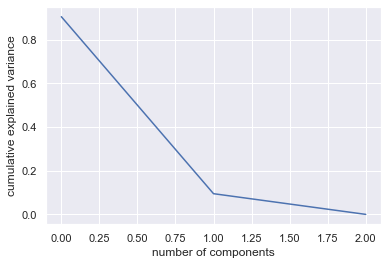

In [297]:
plt.plot(range(pca.n_components_),pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [270]:
# pca.components are the right singular vector which is the eigen vector of the covariance matrix
pca.components_

array([[ 0.79781054,  0.43703573,  0.30871157,  0.27784041],
       [-0.52081239,  0.8466091 ,  0.08144918,  0.07330426],
       [-0.28269852, -0.28269852,  0.38013956,  0.83406056]])

#### Contribution of individual variables on principal components

In [314]:
#computing weights of features on each component:
#where x1=a1u1+a2u2 (some combination of transformed vectors)
#to compute a1 we can just take dot product of x1 with u1
load=np.matmul(X.T,pca.transform(X))

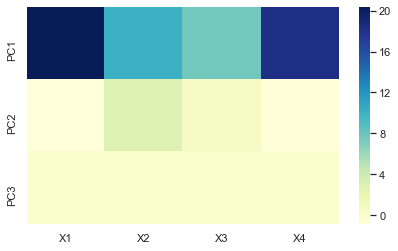

In [305]:
pca_feature= pd.DataFrame(load.T,columns=["X1","X2","X3","X4"],index=["PC1","PC2","PC3"])
plt.figure(figsize=(7,4))
sns.heatmap(pca_feature,cmap="YlGnBu")

#### We observe X1 and X4 variables which are highly correlated are projected on PC1

In [313]:
pca.components_.T

array([[ 0.67492573, -0.28208378, -0.67969265],
       [ 0.33440717,  0.91170163, -0.02745311],
       [ 0.25233323,  0.15740446,  0.10981243],
       [ 0.60743316, -0.2538754 ,  0.7247106 ]])

#### Visualize the direction of variables with respect to the components

In [307]:
def loading_plot(coeff, labels):
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], head_width = 0.05, head_length = 0.05, color = '#21918C',alpha = 0.5)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = '#21918C', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()

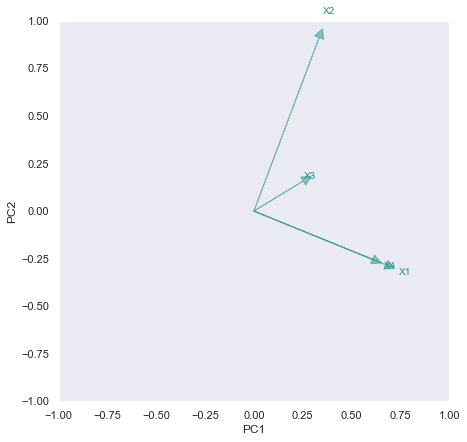

In [309]:
fig, ax = plt.subplots(figsize = (7,7))
loading_plot(pca.components_.T, ["X1","X2","X3","X4"])